In [2]:
#Import all the required libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
#Read the input dataset
loan_df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',sheetname='Data')

In [4]:
#Review the dataframe including no. of columns, their data type, and no. of rows/observations 
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
loan_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


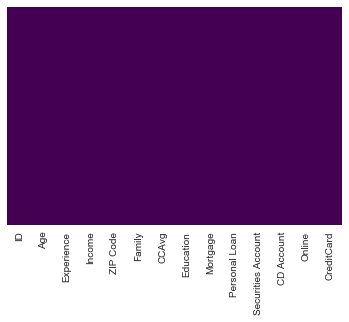

In [6]:
sns.heatmap(loan_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
# Checking for null values
loan_df[loan_df.isnull().any(axis=1)]
# no missing values in the data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [8]:
# Checking for real
loan_df.ix[loan_df.applymap(np.isreal).all(1)==False,:]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [9]:
# Drop the Id sequence as that is just a random number 
loan_df.drop('ID',axis =1,inplace=True)

In [10]:
#Generate descriptive statistics
loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


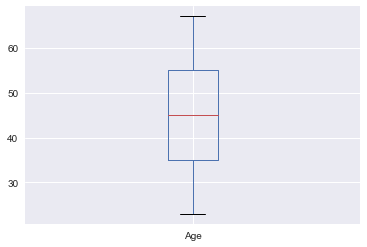

In [11]:
# Univariate descriptive analysis - Age
loan_df.boxplot(column='Age')
#Ranges from 23 to 67
#No missing values
#Boxplot shows no outliers

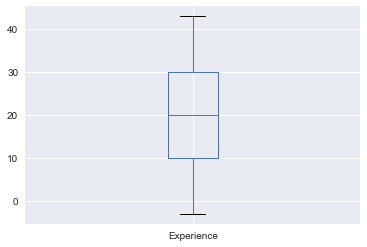

In [12]:
#Distribution of Experience
loan_df.boxplot(column='Experience')

Ranges from -3 to 67 Experience cannot be negative. 52 observations have experience as negative No missing values Boxplot shows no outliers or extreme values Histogram / frequency distribution shows normal distribution No significant difference between mean and mode indicating more of normal distribution

In [13]:
#loan_df.query('Experience<0').count()
len(loan_df[loan_df.Experience < 0])
# 52 observations has negative experience

52

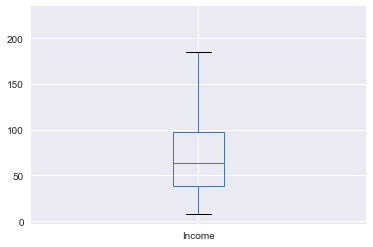

In [14]:
# Distribution of Income
loan_df.boxplot(column='Income')
#Ranges from 8 to 224(max) with no missing values
#Boxplot shows presence of outliers or extreme values; Lets check histogram also

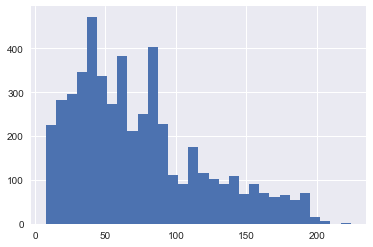

In [15]:
loan_df['Income'].hist(bins=30)
# Frequency distribution shows asymmetry with right skew 

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

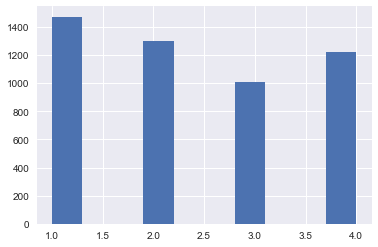

In [16]:
# Univariate descriptive analysis- Family size
loan_df['Family'].hist(bins=10)
loan_df['Family'].value_counts()

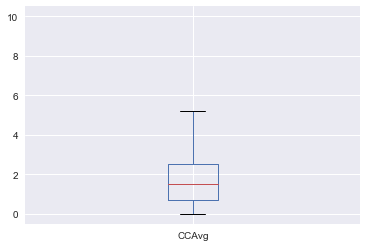

In [17]:
loan_df.boxplot(column='CCAvg')
# CCAvg Ranges from 0 to 10 as seen from summary,lets check its frequency plot

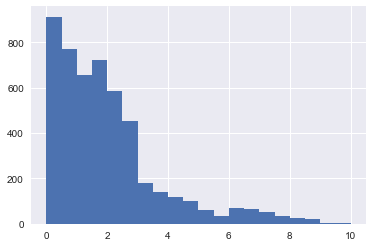

In [18]:
loan_df['CCAvg'].hist(bins=20)
# Frequency distribution shows asymmetry with significant right skew 

1    2096
3    1501
2    1403
Name: Education, dtype: int64

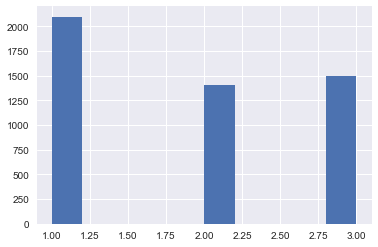

In [19]:
# Univariate descriptive analysis- Education
loan_df['Education'].hist(bins=10)
loan_df['Education'].value_counts()
#Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
# Maximum number of customer are Undergrad

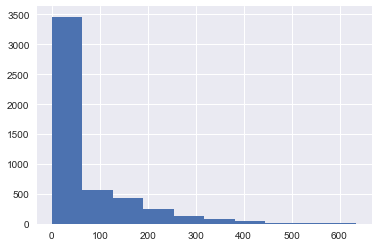

In [20]:
# Univariate descriptive analysis- Mortgage
loan_df['Mortgage'].hist(bins=10)
# Ranges from 0 to 635 and it shows high asymmetry with extreme right skew

In [22]:
loan_df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [23]:
loan_df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [24]:
loan_df['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [25]:
loan_df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

0    4520
1     480
Name: Personal Loan, dtype: int64

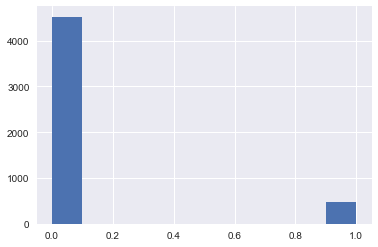

In [26]:
# Univariate descriptive analysis- Experience
loan_df['Personal Loan'].hist(bins=10)
loan_df['Personal Loan'].value_counts()
# ~10% of the observations are related to value of 1 for personal loan

In [27]:
#correlation between dependent variable 'PersonalLoan' and independent variables
loan_df.corr()["Personal Loan"]

Age                  -0.007726
Experience           -0.007413
Income                0.502462
ZIP Code              0.000107
Family                0.061367
CCAvg                 0.366891
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64

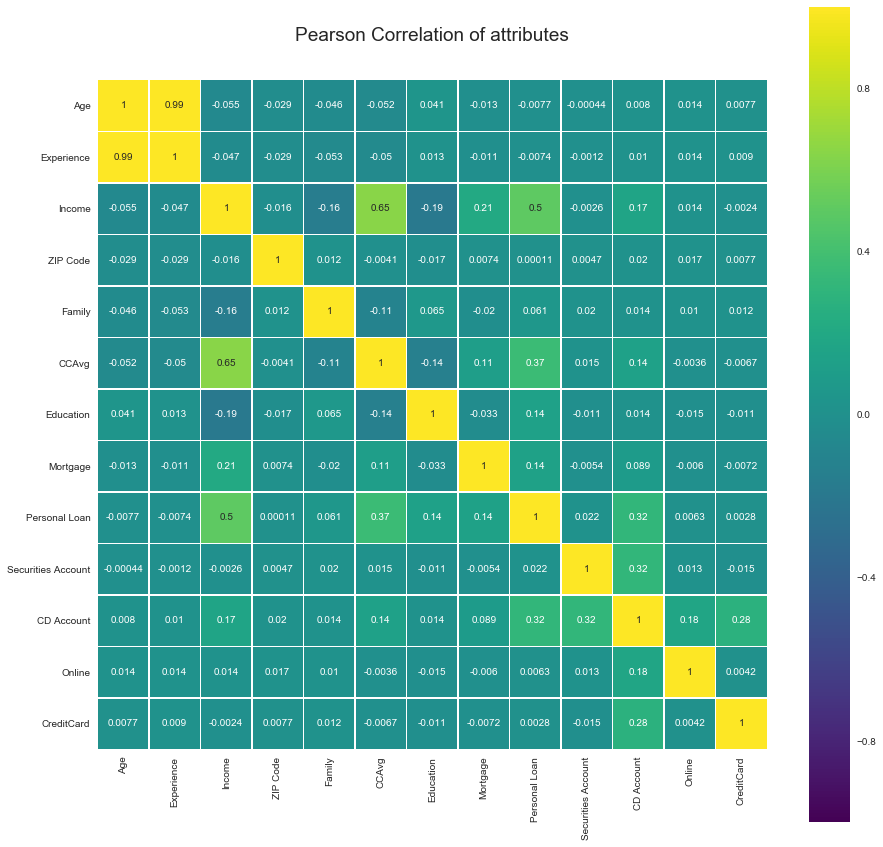

In [28]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(loan_df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
#High corrlation in Age and Experience (Correlation coefficient of 0.99)
#Moderate correlation in Income and CCAvg (Correlation coefficient of 0.65)
#Perfect correlation between Age and Experience indicates that we may have to drop one of these predictors, before we build our model.

# Bivariate Analysis

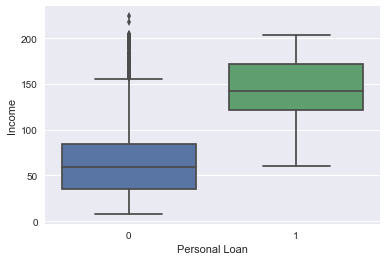

In [29]:
sns.boxplot(x = "Personal Loan", y = "Income", data = loan_df)
# On average,the income of customers who accepted loan offer are higher

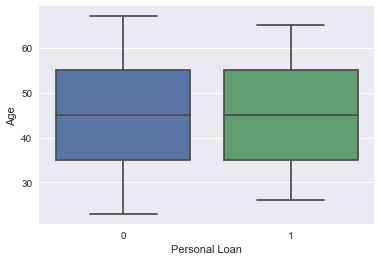

In [30]:
sns.boxplot(x = "Personal Loan", y = "Age", data = loan_df)
#Age seems same for both groups

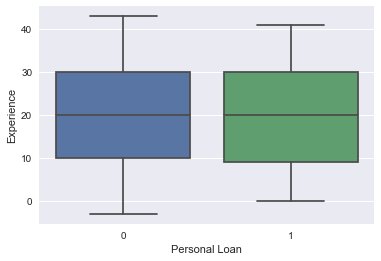

In [31]:
sns.boxplot(x = "Personal Loan", y = "Experience", data = loan_df)
#The -ve experiance is within the 0 group

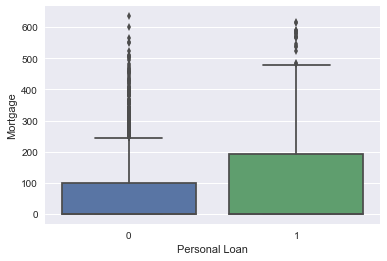

In [32]:
sns.boxplot(x = "Personal Loan", y = "Mortgage", data = loan_df)

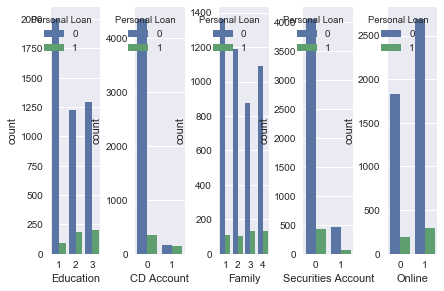

In [33]:
# For categorical predictors
cols = ["Education","CD Account","Family","Securities Account","Online"]
fig, axs = plt.subplots(ncols = 5)
fig.tight_layout()
for i in range(0,len(cols)):
    sns.countplot(x=cols[i], hue="Personal Loan", data=loan_df, ax = axs[i])
# Likelihood of someone accepting the loan increases for more educated customers. 
# Customers having a CD account has much higher probability of accepting the loan

In [34]:
#Preparing the final data for medelling
# replacing outliers for CC Average,Income and Mortgage
loan_df["Income_new"] = loan_df["Income"]
loan_df["CCAvg_new"] = loan_df["CCAvg"]
loan_df["Mortgage_new"] = loan_df["Mortgage"]

In [35]:
#Capping it to 2SD
#X = loan_df.groupby(['Personal_Loan'])['CCAvg'].quantile(.90)
loan_df.ix[np.abs(loan_df.Income-loan_df.Income.mean())>(2*loan_df.Income.std()),"Income_new"] = np.round(loan_df.Income.mean()+2*loan_df.Income.std())

loan_df.ix[np.abs(loan_df.Mortgage-loan_df.Mortgage.mean())>(2*loan_df.Mortgage.std()),"Mortgage_new"] = np.round(loan_df.Mortgage.mean()+2*loan_df.Mortgage.std())

loan_df.ix[np.abs(loan_df.CCAvg-loan_df.CCAvg.mean())>(2*loan_df.CCAvg.std()),"CCAvg_new"] = np.round(loan_df.CCAvg.mean()+2*loan_df.CCAvg.std(),2)

In [36]:
loan_df.head(5)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Income_new,CCAvg_new,Mortgage_new
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,49.0,1.6,0.0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,34.0,1.5,0.0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,11.0,1.0,0.0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,100.0,2.7,0.0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,45.0,1.0,0.0


In [37]:
df_valid = loan_df[["Age","Income_new","ZIP Code","Family","CCAvg_new","Education","Mortgage_new","Personal Loan","Securities Account","CD Account","Online","CreditCard"]]
df_valid.rename(columns={'Income_new': 'Income', 'CCAvg_new': 'CCAvg', 'Mortgage_new': 'Mortgage','Personal Loan':'Personal_Loan'}, inplace=True)

C:\Users\bojha\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [38]:
df_valid.head(5)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities Account,CD Account,Online,CreditCard
0,25,49.0,91107,4,1.6,1,0.0,0,1,0,0,0
1,45,34.0,90089,3,1.5,1,0.0,0,1,0,0,0
2,39,11.0,94720,1,1.0,1,0.0,0,0,0,0,0
3,35,100.0,94112,1,2.7,2,0.0,0,0,0,0,0
4,35,45.0,91330,4,1.0,2,0.0,0,0,0,0,1


In [39]:
# Split the data into training and test set in the ratio of 70:30
# Changing default display options
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# We split the data to train and test
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(df_valid.drop("Personal_Loan", axis=1), 
                                                    df_valid["Personal_Loan"], test_size=0.3, random_state=123)

# Check the shape of train and test sets
list(map(lambda x: x.shape,[X_train, X_test, y_train, y_test]))

[(3500, 11), (1500, 11), (3500,), (1500,)]

In [40]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
log_clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score,roc_auc_score

# Given that we will be calling these performance measures multiple times, we will create a simple function

def generate_perf_measures(clf_mod, score_data, labels, print_prefix):
    pred_label = clf_mod.predict(score_data)
    pred_prob = clf_mod.predict_proba(score_data)
    print("\n")
    print(print_prefix,"Set Performance measures")
    print(print_prefix,"Accuracy",accuracy_score(labels,pred_label))
    print("\n",confusion_matrix(labels,pred_label))
    print("\n",print_prefix,"AUC",roc_auc_score(labels,pred_prob[:,1]))

generate_perf_measures(log_clf,X_train,y_train,"Training")
generate_perf_measures(log_clf,X_test,y_test,"Test")



Training Set Performance measures
Training Accuracy 0.905142857143

 [[3038  128]
 [ 204  130]]

 Training AUC 0.922063957997


Test Set Performance measures
Test Accuracy 0.912666666667

 [[1308   46]
 [  85   61]]

 Test AUC 0.928921915785


In [42]:
# Decision Tree classifier Model

from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [43]:
generate_perf_measures(dt_clf,X_train,y_train,"Training")
generate_perf_measures(dt_clf, X_test, y_test,"Test")



Training Set Performance measures
Training Accuracy 1.0

 [[3166    0]
 [   0  334]]

 Training AUC 1.0


Test Set Performance measures
Test Accuracy 0.978666666667

 [[1336   18]
 [  14  132]]

 Test AUC 0.945407822586


In [44]:
# DT Model is overfitting, so try using Gridsearch
from sklearn.model_selection import GridSearchCV
parameters= {'max_depth' : list(range(2,20,2)), 'min_samples_split' : list(range(5,100,20))}
clf = GridSearchCV(dt_clf, parameters, scoring='roc_auc', cv = 5)
clf.fit(X_train,y_train)
grid_search_results = clf.cv_results_
print("Max AUC achieved",clf.best_score_)
print("Optimal value of Max Depth Hyperparameter - ",clf.best_estimator_.max_depth)
print("Optimal value of Min samples split Hyperparameter - ", clf.best_estimator_.min_samples_split)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18], 'min_samples_split': [5, 25, 45, 65, 85]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

Max AUC achieved 0.994369803939
Optimal value of Max Depth Hyperparameter -  4
Optimal value of Min samples split Hyperparameter -  45


In [45]:
generate_perf_measures(clf,X_train,y_train,"Training")
generate_perf_measures(clf, X_test, y_test,"Test")
#Accuracy jumped from 91% of Logistic regression to 98% DT
# Please note LR models can be enhanced by adding interaction terms,creating dummy of categorical,to model some non-linear relation between predictors



Training Set Performance measures
Training Accuracy 0.983714285714

 [[3153   13]
 [  44  290]]

 Training AUC 0.996798884858


Test Set Performance measures
Test Accuracy 0.98

 [[1344   10]
 [  20  126]]

 Test AUC 0.989063353635


In [46]:
# Linear Discriminant Analysis model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ld_clf = LinearDiscriminantAnalysis()

ld_clf.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [47]:
generate_perf_measures(ld_clf,X_train,y_train,"Training")
generate_perf_measures(ld_clf,X_test,y_test,"Test")



Training Set Performance measures
Training Accuracy 0.949142857143

 [[3120   46]
 [ 132  202]]

 Training AUC 0.961039071573


Test Set Performance measures
Test Accuracy 0.956

 [[1336   18]
 [  48   98]]

 Test AUC 0.966072115093


In [48]:
# Try Bagging ensemble method Random Forest,a ensemble of CART Trees
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=50)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [49]:
generate_perf_measures(ld_clf,X_train,y_train,"Training")
generate_perf_measures(ld_clf,X_test,y_test,"Test")



Training Set Performance measures
Training Accuracy 0.949142857143

 [[3120   46]
 [ 132  202]]

 Training AUC 0.961039071573


Test Set Performance measures
Test Accuracy 0.956

 [[1336   18]
 [  48   98]]

 Test AUC 0.966072115093


In [50]:
# Accuracy not improved by bagging ensemble.Lets try Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
parameters= {'n_estimators' : list(range(25,50,75)), 'min_samples_split' : list(range(5,100,20))}
clf = GridSearchCV(rf_clf, parameters, scoring='roc_auc', cv = 5)
clf.fit(X_train,y_train)
grid_search_results = clf.cv_results_
print("Max AUC achieved",clf.best_score_)
print("Optimal value of Max Depth Hyperparameter - ",clf.best_estimator_.n_estimators)
print("Optimal value of Min samples split Hyperparameter - ", clf.best_estimator_.min_samples_split)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [25], 'min_samples_split': [5, 25, 45, 65, 85]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

Max AUC achieved 0.996047471953
Optimal value of Max Depth Hyperparameter -  25
Optimal value of Min samples split Hyperparameter -  25


In [51]:
generate_perf_measures(clf,X_train,y_train,"Training")
generate_perf_measures(clf, X_test, y_test,"Test")



Training Set Performance measures
Training Accuracy 0.989714285714

 [[3163    3]
 [  33  301]]

 Training AUC 0.999225490901


Test Set Performance measures
Test Accuracy 0.982666666667

 [[1349    5]
 [  21  125]]

 Test AUC 0.995330932195


In [52]:
# Ensemble enhanced the accuracy further. Lets try voting ensemble also by combining the 3 classifiers - LR, DT & LDA
from sklearn.ensemble import VotingClassifier
# Fine tune the DT model as per GridSearch result
dt_clf = DecisionTreeClassifier(max_depth = 4, min_samples_split = 45)
voting_clf = VotingClassifier(estimators=[
            ('lr', log_clf), ('dt', dt_clf), ('rf', rf_clf), ('ld', ld_clf)], voting='soft')
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('dt', Decisio...None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001))],
         n_jobs=1, voting='soft', weights=None)

In [53]:
# Compute performance measures
generate_perf_measures(voting_clf,X_train,y_train,"Training")
generate_perf_measures(voting_clf,X_train,y_train,"Test")




Training Set Performance measures
Training Accuracy 0.984571428571

 [[3166    0]
 [  54  280]]

 Training AUC 0.99837721903


Test Set Performance measures
Test Accuracy 0.984571428571

 [[3166    0]
 [  54  280]]

 Test AUC 0.99837721903


In [54]:
# We compare the results we have got thru the different techniques:

result_comparison = pd.DataFrame({"Algo": ["LR","DT","RF","Voting"], 
                                  "Test AUC": [92.89,98.9,99.45,99.82],
                                 "Test Accuracy": [91.26,98,98.4,98.48]})
result_comparison

,Algo,Test AUC,Test Accuracy
0,LR,92.89,91.26
1,DT,98.90,98.00
2,RF,99.45,98.40
3,Voting,99.82,98.48


# Conclusion

As we have seen, Ensemble techniques performed better than single classifiers. This is due to:

#Single classifiers tend to have "High Variance". Combining multiple classifiers, the variance comes down resulting in better stable models. Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.Voting classifier does even better than Random Forest classifier. In RF,ensemble of the same type of CART. However, when we created a Voting clasisfier, we combine different types of models -linear models and non linear models